# Training

## Allplan vs Allplan Bridge

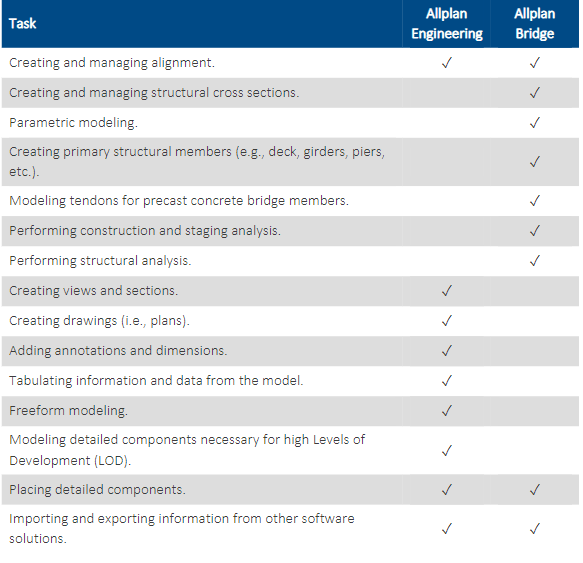

# Training PDF Creation

## Getting PDF Segments

In [9]:
root_folder = r"D:\MB Projects\Allplan Training\_Self-Paced Training"

In [10]:
import os

list_of_pdfs = []
list_of_folders = []

for root, dirs, files in os.walk(root_folder, topdown=False):
    for name in files:
        if os.path.join(root, name).endswith(".pdf"):
            list_of_pdfs.append(os.path.join(root, name))
    for name in dirs:
        list_of_folders.append(os.path.join(root, name))

In [11]:
# Sort the folders
list_of_folders = sorted(list_of_folders)

In [12]:
from PyPDF2 import PdfMerger, PdfReader
from pathlib import Path

merger = PdfMerger()
i = 0

# files is supposed to be a list of your filenames.
for folder in list_of_folders:
    if (
        len(folder.split("\\")) == 6
    ):  # Skip the child directories to prevent the script from running twice on every folder
        continue

    bookmark_name = os.path.basename(folder)
    parent = merger.add_outline_item(title=str(bookmark_name), pagenum=i)
    print(bookmark_name)

    for root, dirs, files in os.walk(folder):
        if files == []:  # Skip directories that don't have files
            pass
        else:  # Get the pdf files out of directories with files
            pdf_files = [root + "\\" + file for file in files if file.endswith("pdf")]

            # Add the pdfs to the main document
            for file_name in pdf_files:
                parent_2 = merger.add_outline_item(
                    title=str(os.path.basename(Path(file_name).parent)),
                    pagenum=i,
                    parent=parent,
                )
                merger.append(file_name, import_outline=False)

                # Adjust the page number to account for the pages that were just added
                # It's not ugly if it works, nobody's ever going to read this anyway
                with open(file_name, "rb") as f:
                    pdf = PdfReader(f)

                    for value in range(len(pdf.outline)):
                        try:
                            parent_3 = merger.add_outline_item(
                                title=pdf.outline[value].title,
                                pagenum=pdf.get_destination_page_number(
                                    pdf.outline[value]
                                )
                                + i,
                                parent=parent_2,
                            )
                        except AttributeError as e:
                            try:
                                for value_2 in range(len(pdf.outline[value])):
                                    parent_4 = merger.add_outline_item(
                                        title=pdf.outline[value][value_2].title,
                                        pagenum=pdf.get_destination_page_number(
                                            pdf.outline[value][value_2]
                                        )
                                        + i,
                                        parent=parent_3,
                                    )
                            except AttributeError as e:
                                for value_3 in range(len(pdf.outline[value][value_2])):
                                    merger.add_outline_item(
                                        title=pdf.outline[value][value_2][
                                            value_3
                                        ].title,
                                        pagenum=pdf.get_destination_page_number(
                                            pdf.outline[value][value_2][value_3]
                                        )
                                        + i,
                                        parent=parent_4,
                                    )

                    i = i + len(pdf.pages)

merger.write(root_folder + "\\allplan_training.pdf")
merger.close()

01. BTC01 - Intro to Allplan Bridge
02. BTC02 - Axes
03. BTC03 - Cross Sections
04. BTC04 - Structural Members
05. BTC05 - Variations
06. BTC06 - Intro to Allplan Engineering
07. BTC07 - Plan Production
08. BTC08 - Freeform Modeling
09. BTC09 - Attributes
10. BTC10 - Rebar Detailing 1
11. BTC11 - Rebar Detailing 2
12. BTC12 - Rebar Detailing 3
13. BTC13 - Introduction to Reports


## Allplan Files

In [9]:
# Main bridge details are stored in the .abdb file
path_to_file = (
    r"C:\Data\Allplan\Allplan 2024\PrjBridge\Precast-Girder-Bridge\AllplanBridge.abdb"
)

In [10]:
import sqlite3
import pandas as pd

In [11]:
con = sqlite3.connect(path_to_file)

In [12]:
cur = con.cursor()

In [13]:
sql_query = """SELECT name FROM sqlite_master  
  WHERE type='table';"""

In [14]:
cur.execute(sql_query)

In [15]:
tables = [x for x in cur.fetchall()]

In [16]:
all_tables = {}  # Define a dict to store the pandas tables in
con.text_factory = (
    bytes  # Set the text factory to bytes to be able to process symbols like �
)

for table_names in tables:
    print(f"Table Stored: {table_names[0]}")

    db_table = pd.read_sql_query(f"SELECT * from {table_names[0]}", con)
    all_tables[table_names[0]] = db_table

Table Stored: ObjRec
Table Stored: DataRec
Table Stored: KeysText
Table Stored: KeysInt
Table Stored: KeyValues
Table Stored: Results
Table Stored: GraphRecalc


In [17]:
all_tables["KeysInt"]

,KeyType,FatherID,Key,ObjectID
0,177,3,11,53
1,179,57,1,61
2,179,57,2,62
3,179,57,3,63
4,179,57,4,64
5,179,57,5,65
6,179,57,12,66
7,179,68,1,72
8,179,68,2,73
9,179,68,3,74


In [18]:
DataRec = pd.read_sql_query("SELECT * from DataRec", con)
DataRec

,DataID,DataType,DataSize,AttachID,Data
0,1,1010,256,0,b'_default_\x00\x00\x00\x00\x00\x00\x00\x00\x0...
1,2,1077,512,0,b'6\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0...
2,3,1078,512,0,b'S 450\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0...
3,4,1006,256,0,b'Bim+: Standard EN\x00\x00\x00\x00\x00\x00\x0...
4,5,1079,512,0,b'E\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0...
...,...,...,...,...,...
37333,37334,1029,512,0,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...
37334,37335,1029,512,0,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...
37335,37336,1029,512,0,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...
37336,37337,1029,512,0,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...
